<a href="https://colab.research.google.com/github/clarissesieczko/MVPAnaliseDados/blob/main/MVP_PUC_Vinho_tinto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

## Aluno: Clarisse Lopes Sieczko



## 1. Definição do Problema

O dataset usado neste projeto será o **Wine+Quality**, retirado do site UC Irvine Machine Learning Repository e seu objetivo é determinar a qualidade de vinhos tintos do norte de Portugal, com base em testes físico-quimicos (inputs) e sensorial (output). Este dataset é um subconjunto do dataset original pois por motivos de logística e privacidade, alguns dados foram excluidos (dados sobre tipos de uva, marcas de vinho, preço, etc) e aqui, são utilizados 12 atributos considerados relevantes para a análise.

Para mais detalhes sobre este dataset, consulte: https://archive.ics.uci.edu/dataset/186/wine+quality


**Informações sobre os atributos:**
Variáveis de input (baseado em testes físico-químicos):
   
   1 - acidez fixa

   2 - acidez volátil

   3 - acido cítrico

   4 - açúcar residual
   
   6 - dióxido sulfurico livre

   7 - dióxido sulfurico total

   8 - densidade

   9 - pH

   10 - sulfatos

   11 - álcool


Variável de output (baseado em dado sensorial):

   12 - qualidade (pontuação entre 0 e 10)



=> Importando bibliotecas necessárias (outras poderão ser importadas ao longo deste trabalho, conforme necessidade.

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings


In [3]:
# não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Para a carga de dados, utilizarei o pacote Pandas para carregar a partir de um repositório próprio do github um arquivo .csv com cabeçalho já disponível (em inglês).

In [4]:
# importação do dataset através da URL
url = "https://raw.githubusercontent.com/clarissesieczko/MVPAnaliseDados/main/winequality-red.csv"


# definição do delimitador
dataset = pd.read_csv(url, delimiter=';')

In [5]:
# impressão das primeiras linhas do dataset, mostrando uma visualização dos dados contidos no conjunto de dados carregado
dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [6]:
# verificação de quantos atributos e instâncias existem no dataset
print(dataset.shape)

(1599, 12)


In [7]:
# tipos de dados/atributos do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [8]:
# 10 primeiras linhas do dataset
dataset.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

=> Como primeiras impressões nas primeiras 10 linhas, é possível verificar que há
valores 0 no atributo citric acid.

In [9]:
# 10 últimas linhas do dataset
dataset.tail(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1589            6.6             0.725         0.20             7.8      0.073   
1590            6.3             0.550         0.15             1.8      0.077   
1591            5.4             0.740         0.09             1.7      0.089   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1589                 29.0                  79.0  0.99770  3.29       0.54   
1590                 26.0                  35.0  0.99314  3.32       0.82   
1591                 16.0                  26.0  0.99402  3.67       0.56   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1589      9.2        5  
1590     11.6        6  
1591     11.6        6  
1592     11.0        6  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [8]:
# resumo estatístico dos atributos do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

**Observando rapidamente as estatísticas, é possível identificar que em média, a qualidade dos vinhos listados nesse dataset é considerado boa. Levando em consideração parâmetros como: 1 a 4: ruim (1) / 5 a 7: bom (2) / 8 a 10: ótimo (3).**


=> Pode ser útil para futuras análises, então será criado um novo atributo, que transformará o atributo inteiro QUALIDADE (QUALITY) em atributo categórico nominal: QUALIDADE_CAT (QUALITY_CAT)

In [9]:
#categorizando a qualidade
def categorize_quality(score):
    if score <= 4:
        return '1'
    elif score <= 7:
        return '2'
    else:
        return '3'

# Criando a coluna
dataset['quality_cat'] = dataset['quality'].apply(categorize_quality)


In [10]:
#verificando a nova coluna criada acima
dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality quality_cat  
0      9.4        5           2  
1      9.8        5           2  
2      9.8        5           2  
3      9.8        6           2  
4      9.4        5           2

**Distribuição das classes**

Veremos que as classes ruim (1), bom (2) e ótimo (3) estão desbalanceadas. Onde "bom" (2) corresponde a maior parte do dataset. Mais adiante em outras etapas veremos se esse fator precisará de tratamento.

In [12]:
# distribuição das classes (dependente)
print(dataset.groupby('quality_cat').size())

quality_cat
1      63
2    1518
3      18
dtype: int64


### 3.2. Visualizações

Vamos observar agora um histograma para cada atributo do dataset. Veremos a maioria dos atributos seguem uma distribuição exponencial, e que as colunas dentisy e ph seguem uma distribuição normal.

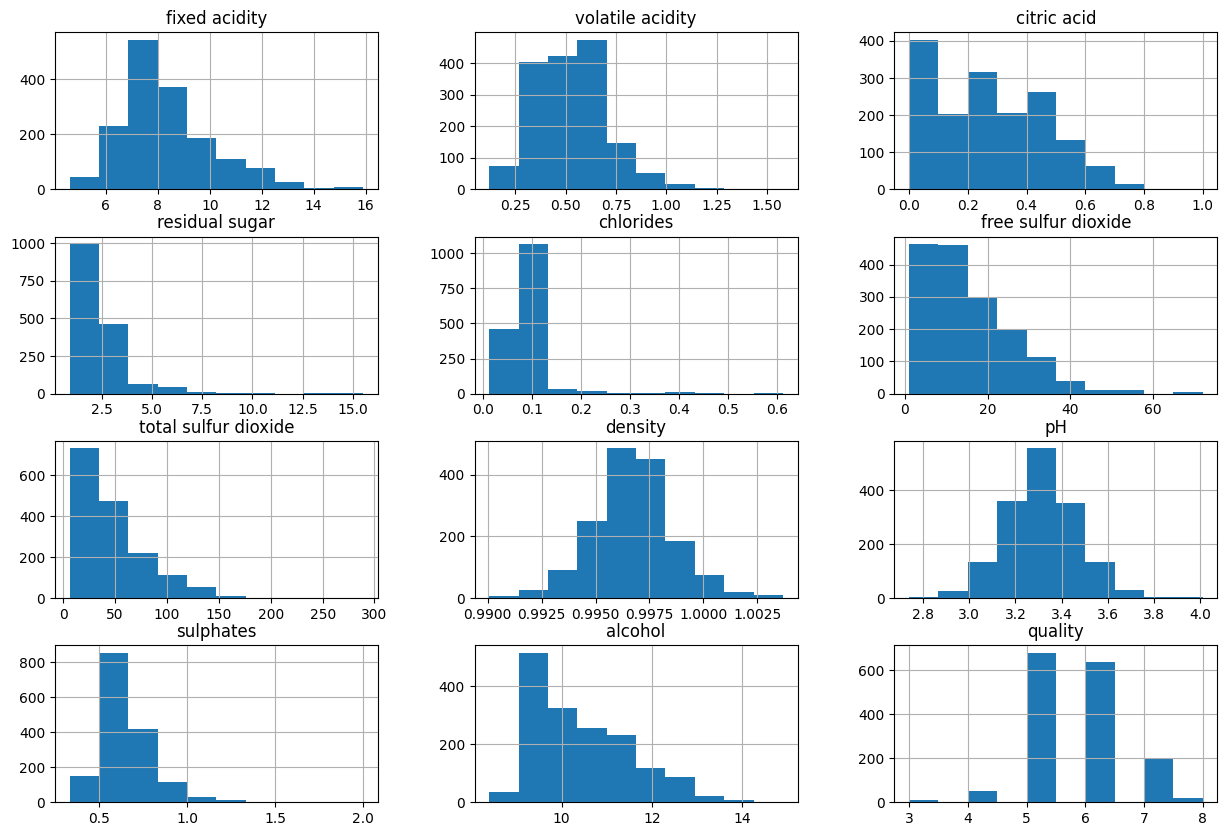

In [13]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

O Gráfico de Densidade, ou Density Plot, demonstrou que muitos dos atributos têm uma distribuição distorcida (com exceção do PH e Density que já no histograma demonstrou uma distribuição normal. Uma transformação como a Box-Cox, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.

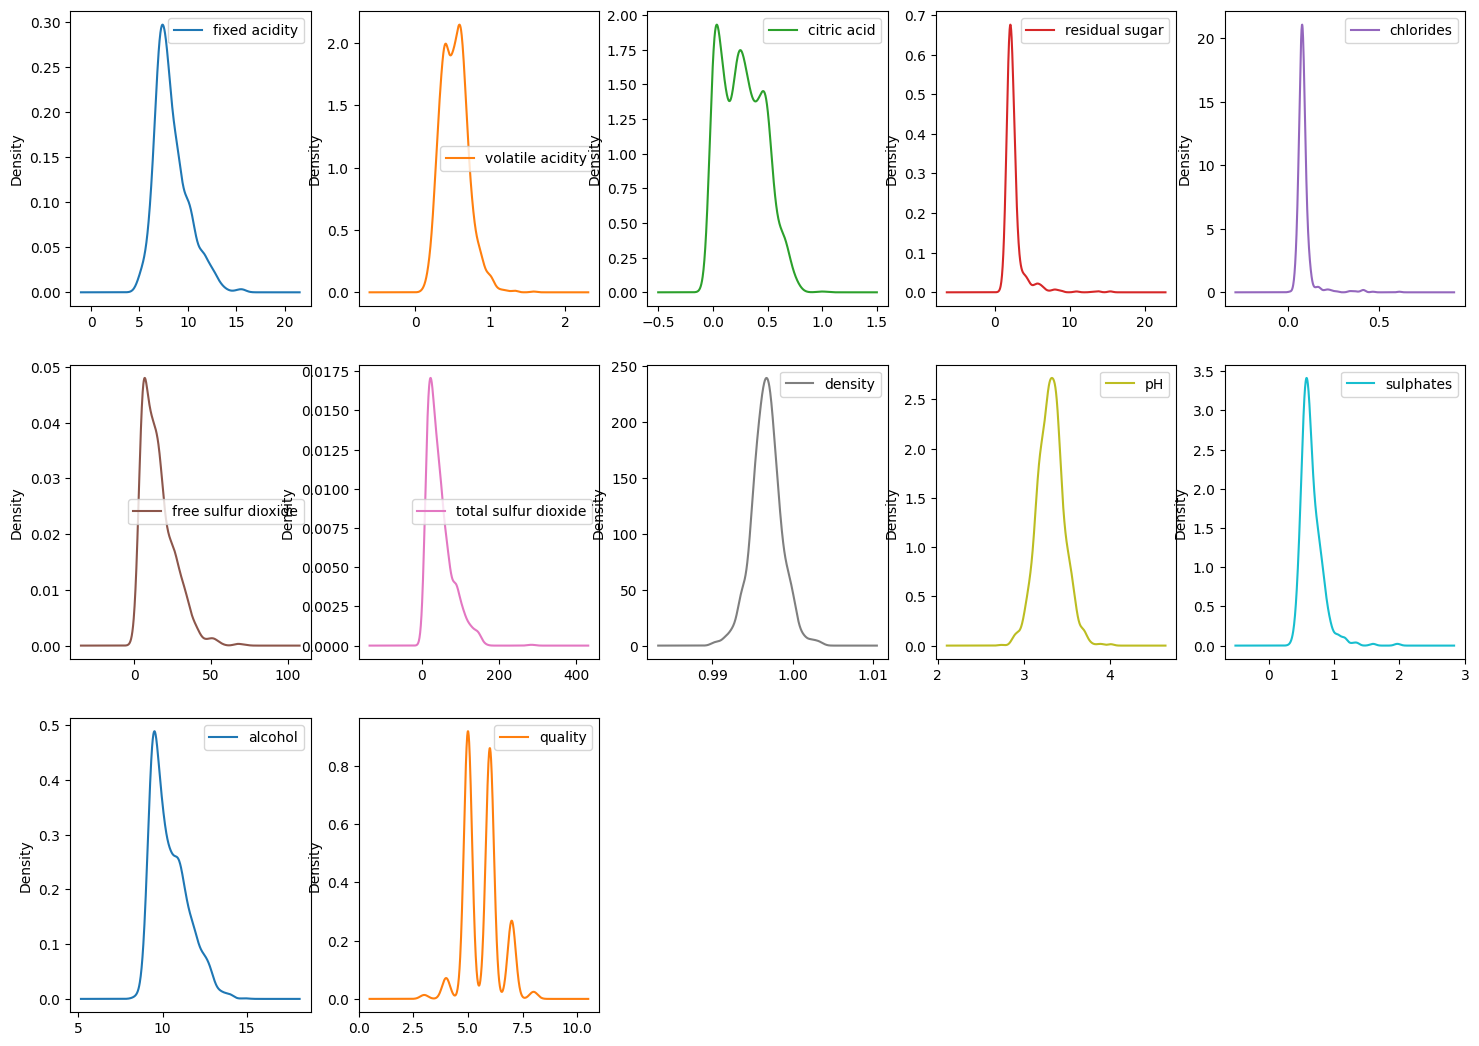

In [33]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,5), sharex = False, figsize = (18,13))
plt.show()

No **boxblot**, a linha no centro (verde) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). Com o boxplot, vemos uma grande quantidade de outliers. Esses outliers precisam ser analisados se fazem parte da natureza dos dados ou se representam algum problema. Se forem mantidos, será necessário pensar em aplicar um modelo que seja menos sensível a valores extremos, como um algorítimo de máquina tolerante a outliers.



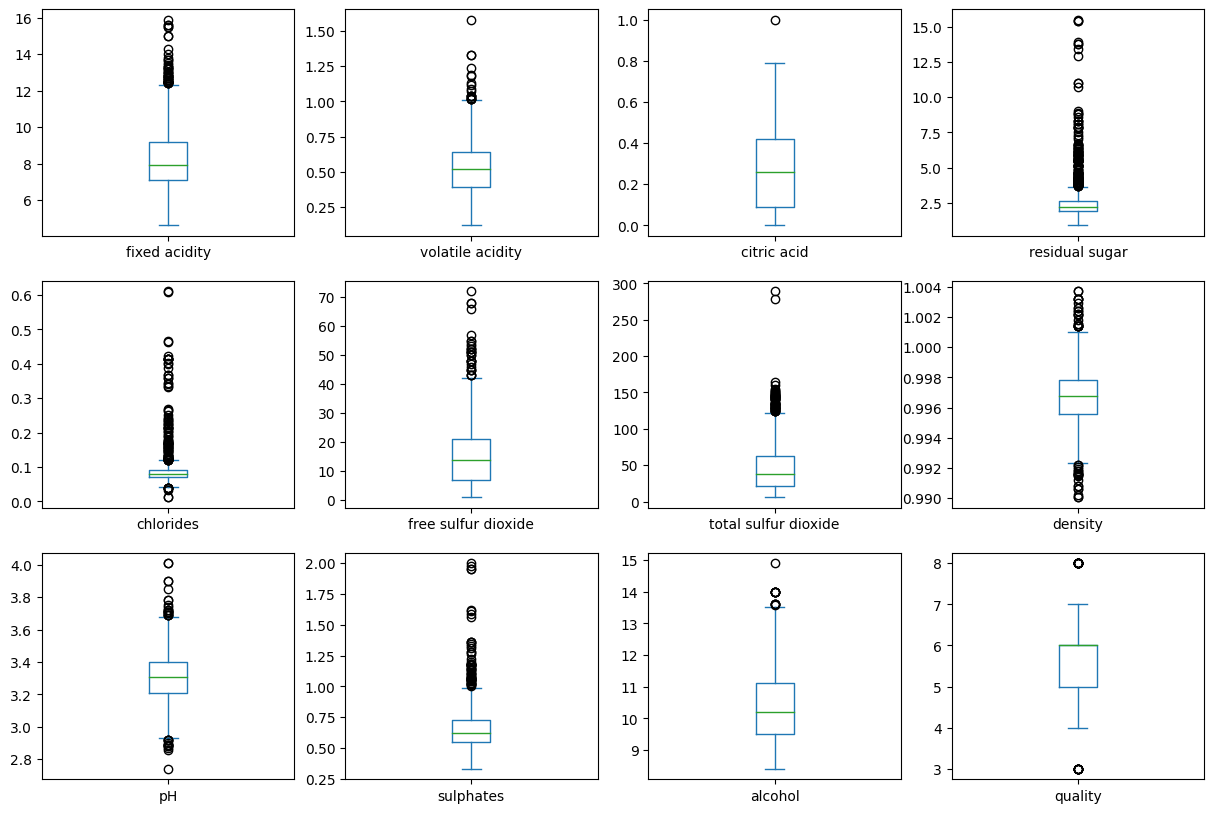

In [34]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,4), sharex = False, sharey = False, figsize = (15,10))
plt.show()

O gráfico de correlação abaixo demonstra que não há nenhuma correlação forte entre os atributos. Mas podemos observar uma correlação positiva modesta entre os atributos:
- fixed acidity e citric acid (0.67)
- fixed acidity e density (0.67)
- total sulfur dioxide e free sulfur dioxide (0.67)
- **alcohol e quality (0.48)**

Também podemos observar algumas correlações negativas modestas. Onde gostaria de destacar, ainda que menor que as acima:

**quality e volacity acidity (0,39)**

Essas correlações relacionadas a qualidade são as que mais interessam no modelo, pois o objetivo é determinar a qualidade de um vinho com base nas características físico-químico. Então podemos estimar com base nessa análise que:

- quanto maior o teor de  álcool, o vinho foi melhor avaliado. Não significa portanto que seria o máxim teor.
- quanto menor a acidez volátil, a qualidade do vinho aumentou.

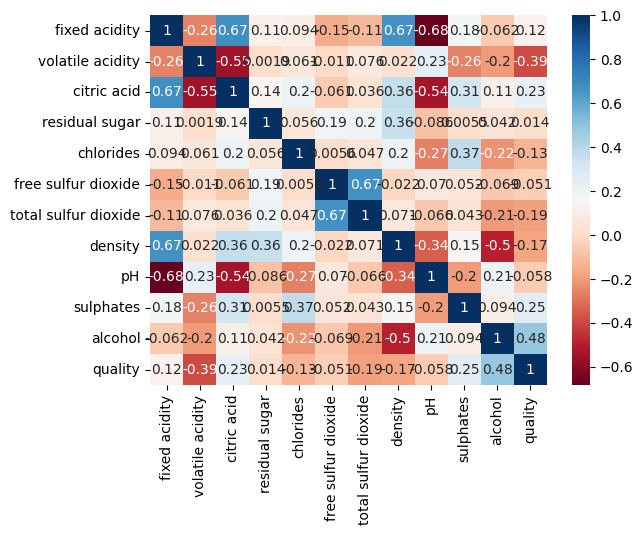

In [15]:
# Matriz de Correlação
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

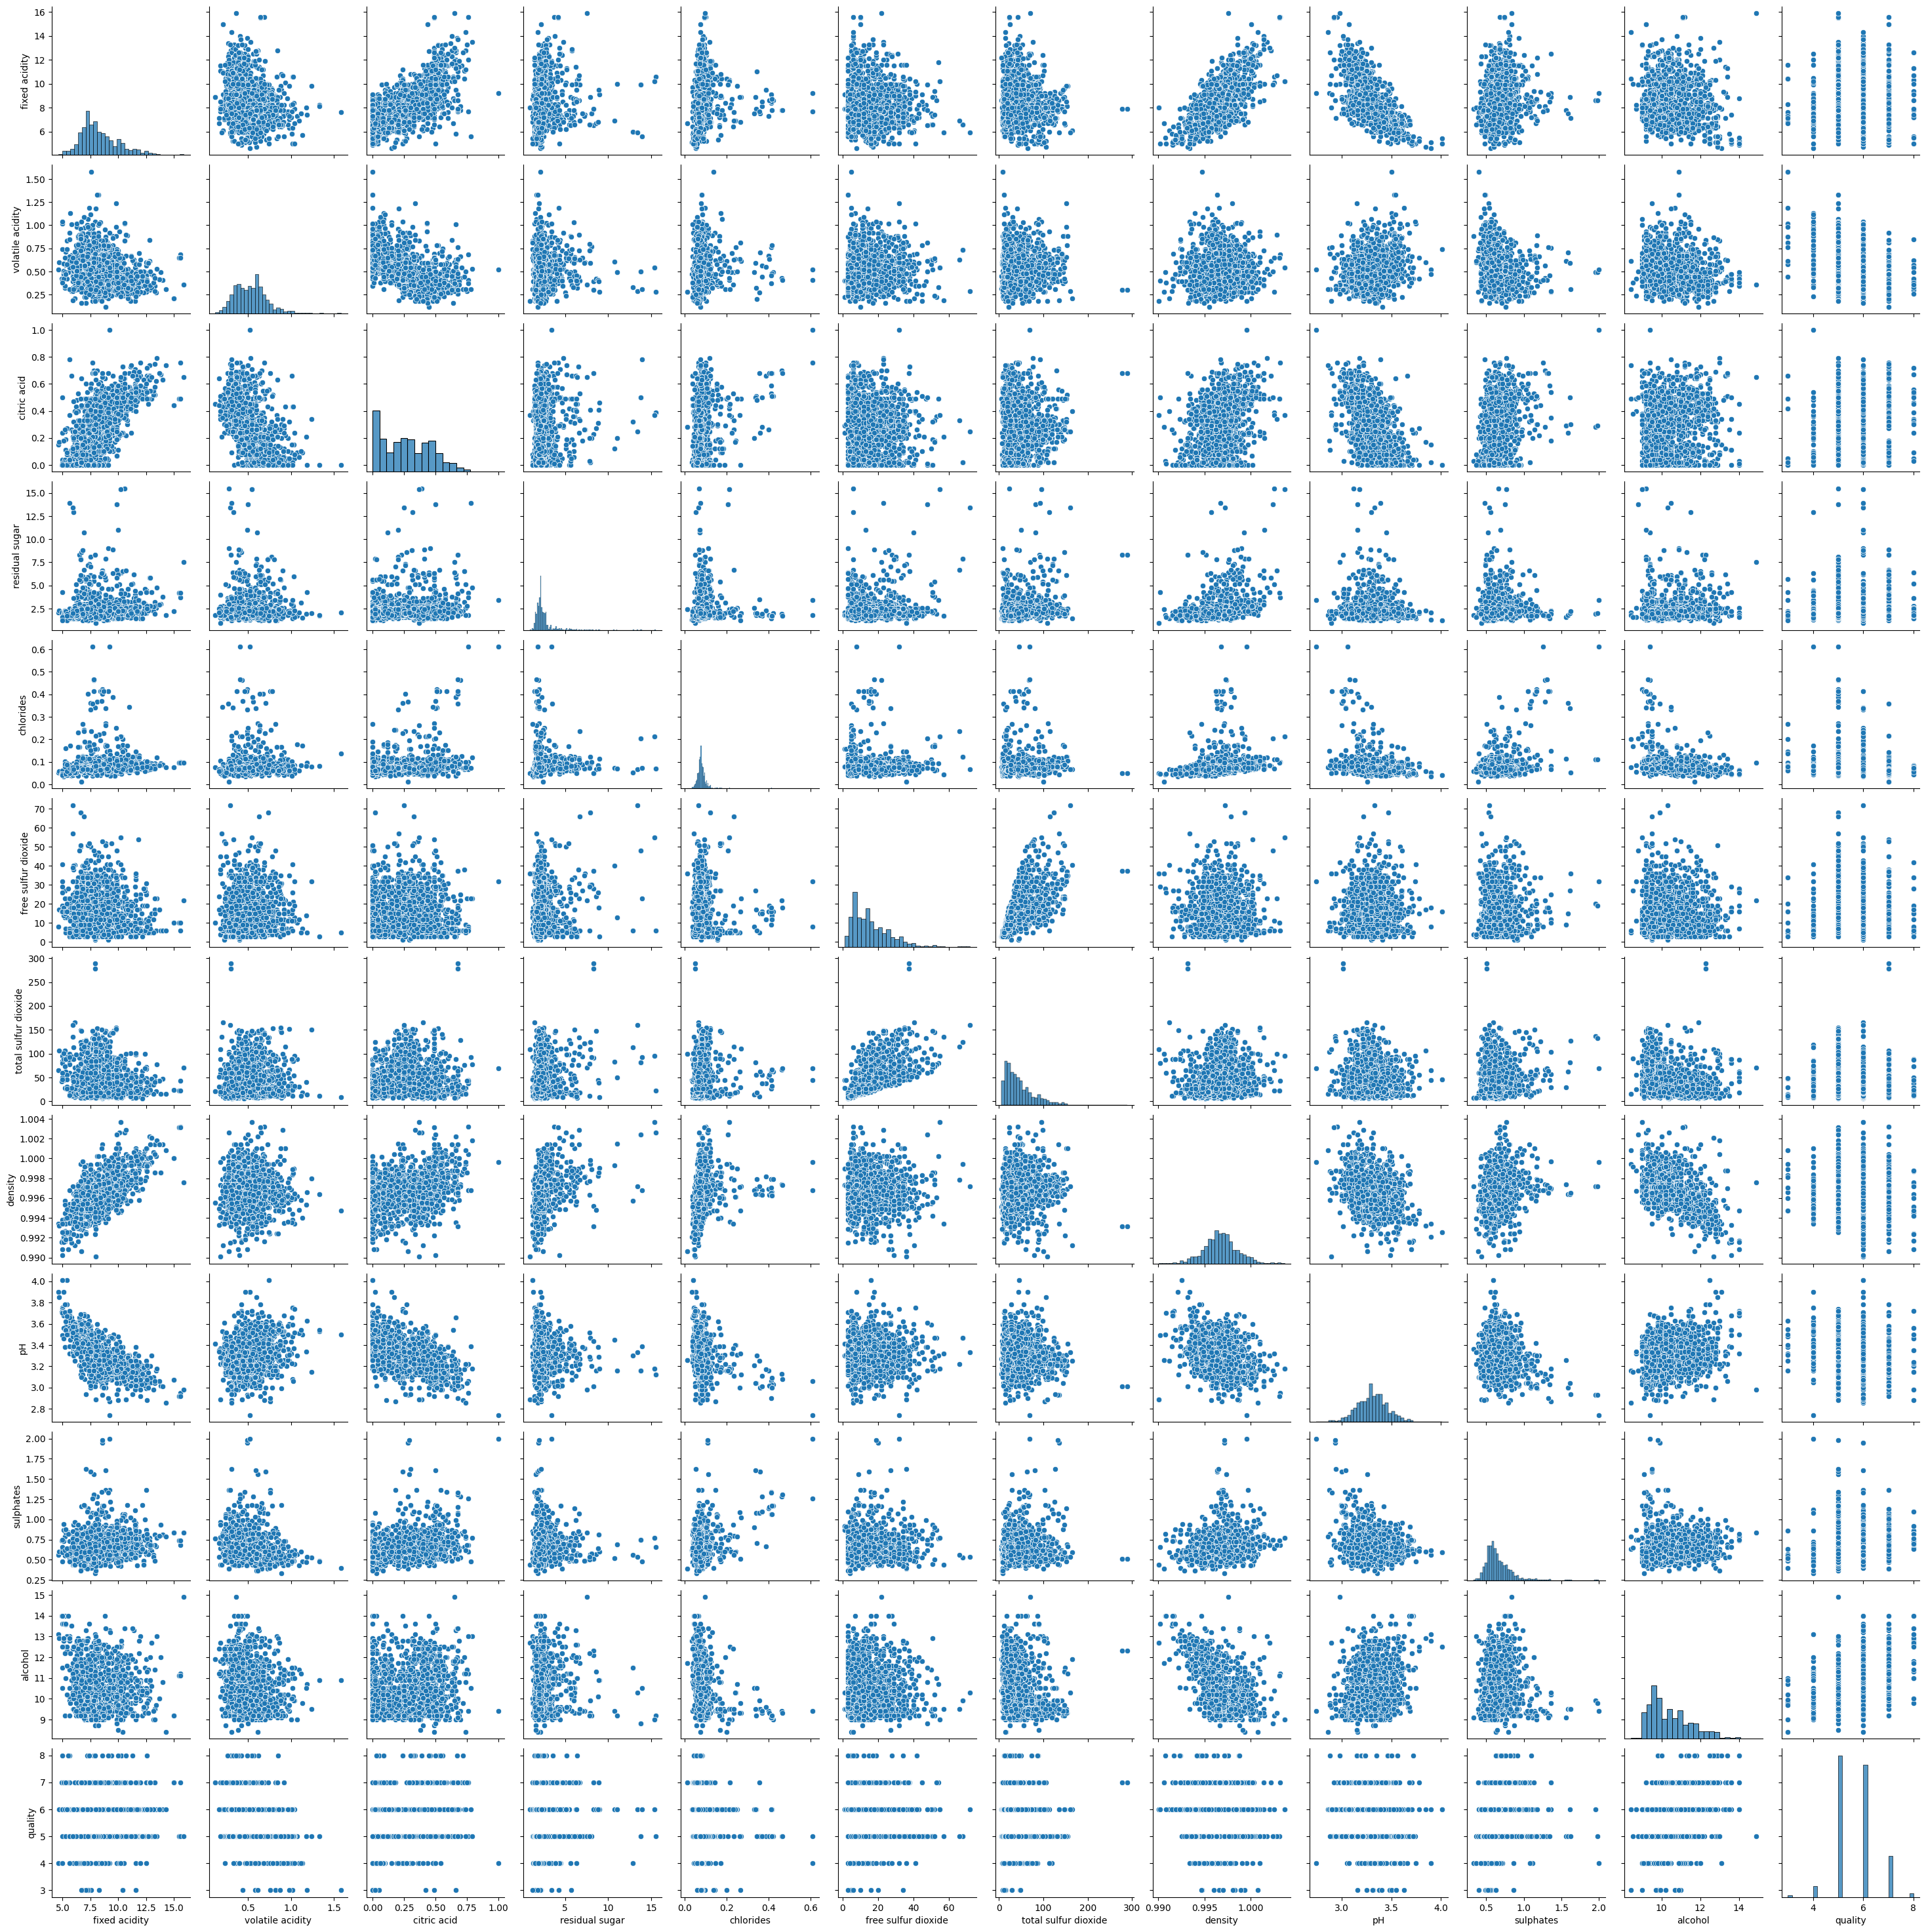

In [16]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(dataset)

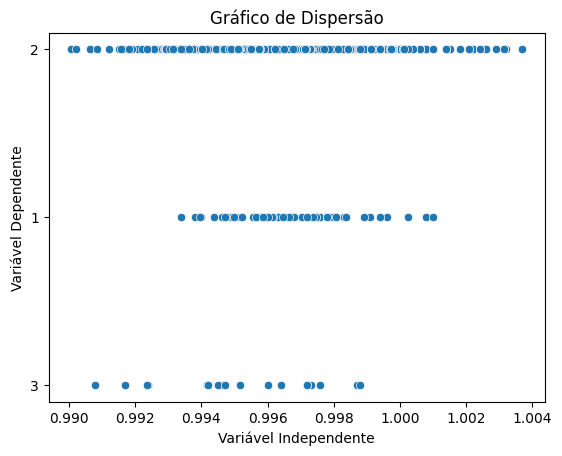

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# analisando a correlação individual dos atributos independentes com o dependente quality_cat
sns.scatterplot(data=dataset, x='density', y='quality_cat')
plt.title('Gráfico de Dispersão')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.show()


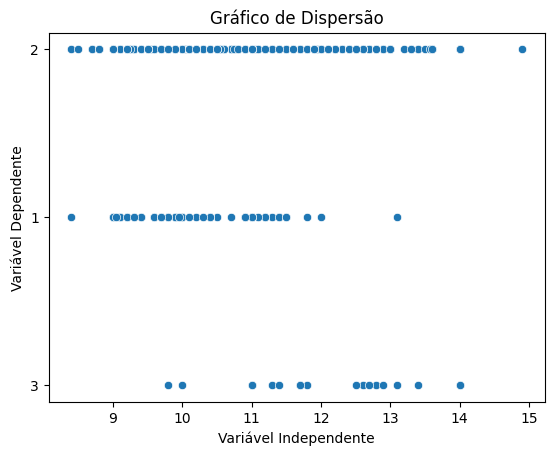

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# analisando a correlação individual dos atributos independentes com o dependente quality_cat
sns.scatterplot(data=dataset, x='alcohol', y='quality_cat')
plt.title('Gráfico de Dispersão')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.show()

Podemos observar acima a correlação entre os atributos dependente e independente, onde os vinhos com maiores pontuação (ótimo) possuem teor alcólico concentrados entre 11 e 13. O desbalanceamento do dataset pode estar influenciando o resultado da análise.

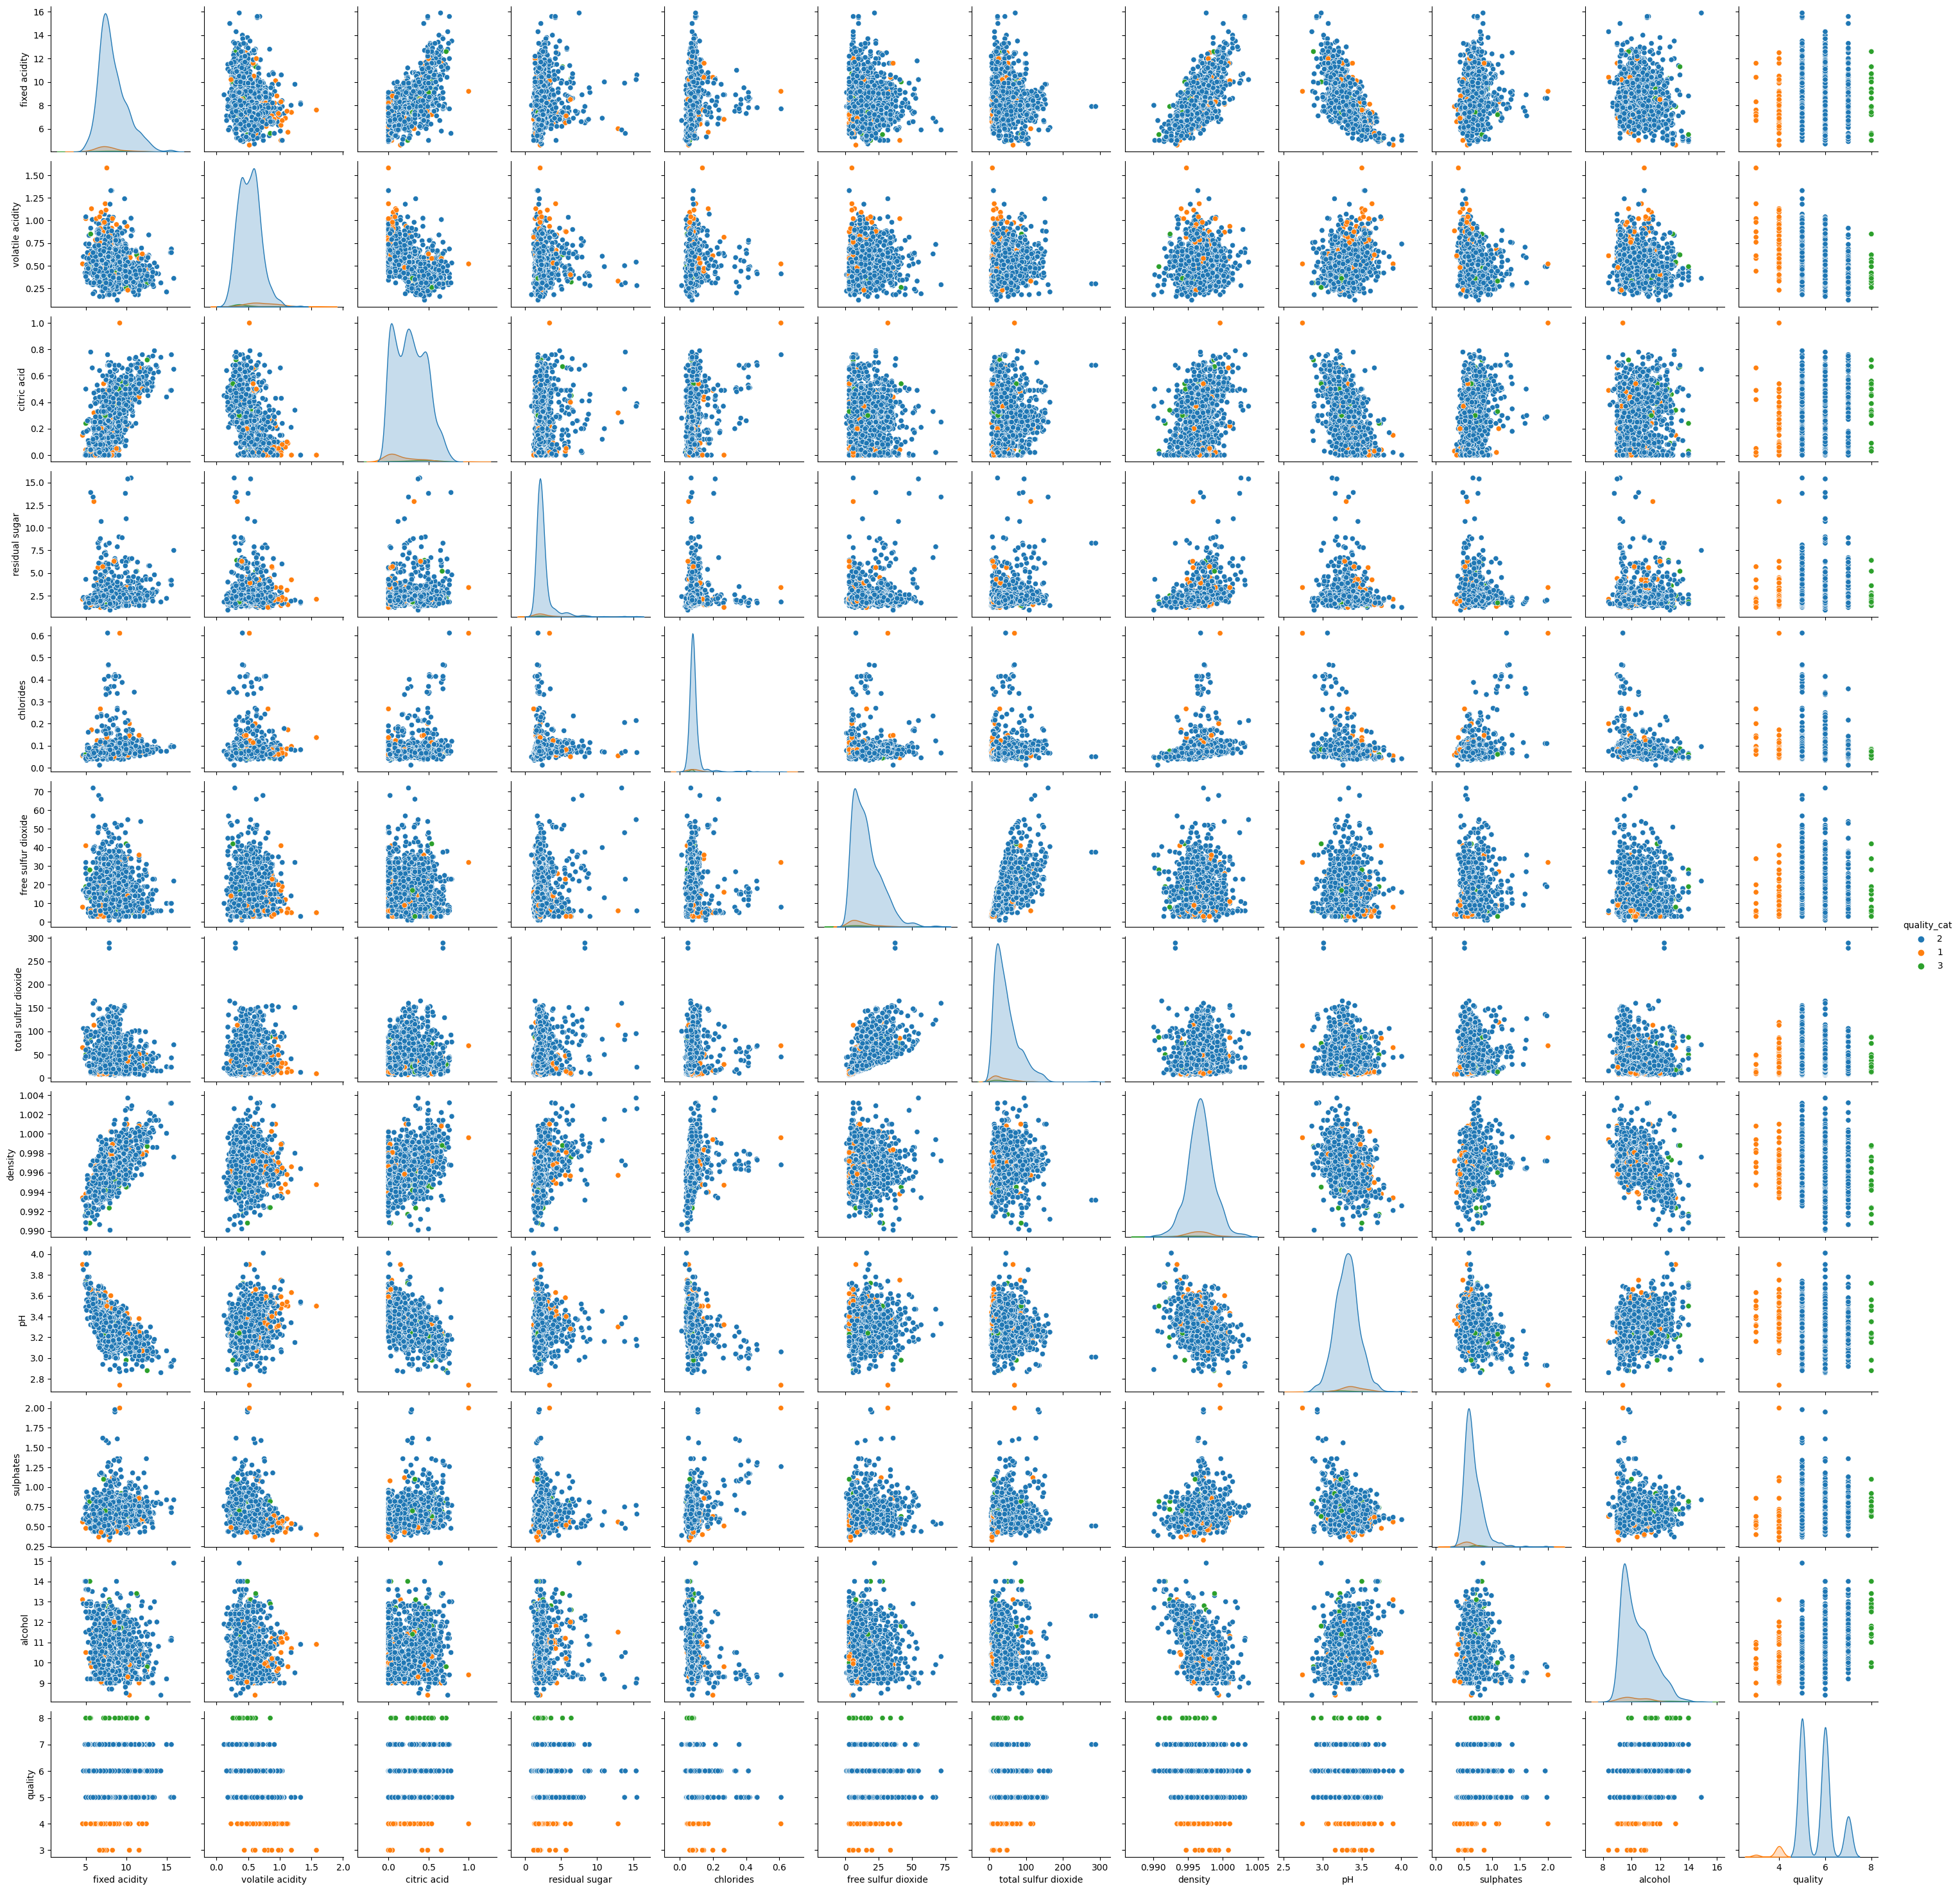

In [23]:
# Scatter Plot utilizando como parâmetro dependente, quality_cat

sns.pairplot(dataset, hue = "quality_cat", height = 2.5);

## 4. Pré-Processamento de dados

Será realizado nessa etapa, operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados.
Um tratamento foi já realizado na etapa anterior de análise, que foi a transformação das instâncias do atributo "quality", criando um novo atributo "quality_cat" para reduzir a distribuição e facilitar alguns entendimentos.

### 4.1. Tratamento de Missings e Limpeza

Com base no reultado da consulta, é possível saber que o datset Wine+QUality não tem missings aparentes, mas valores "0" que parecem ser missings. Vamos então fazer este tratamento e criar uma nova visão do nosso dataset.

In [11]:
# verificando nulls no dataset
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_cat             0
dtype: int64

<Axes: >

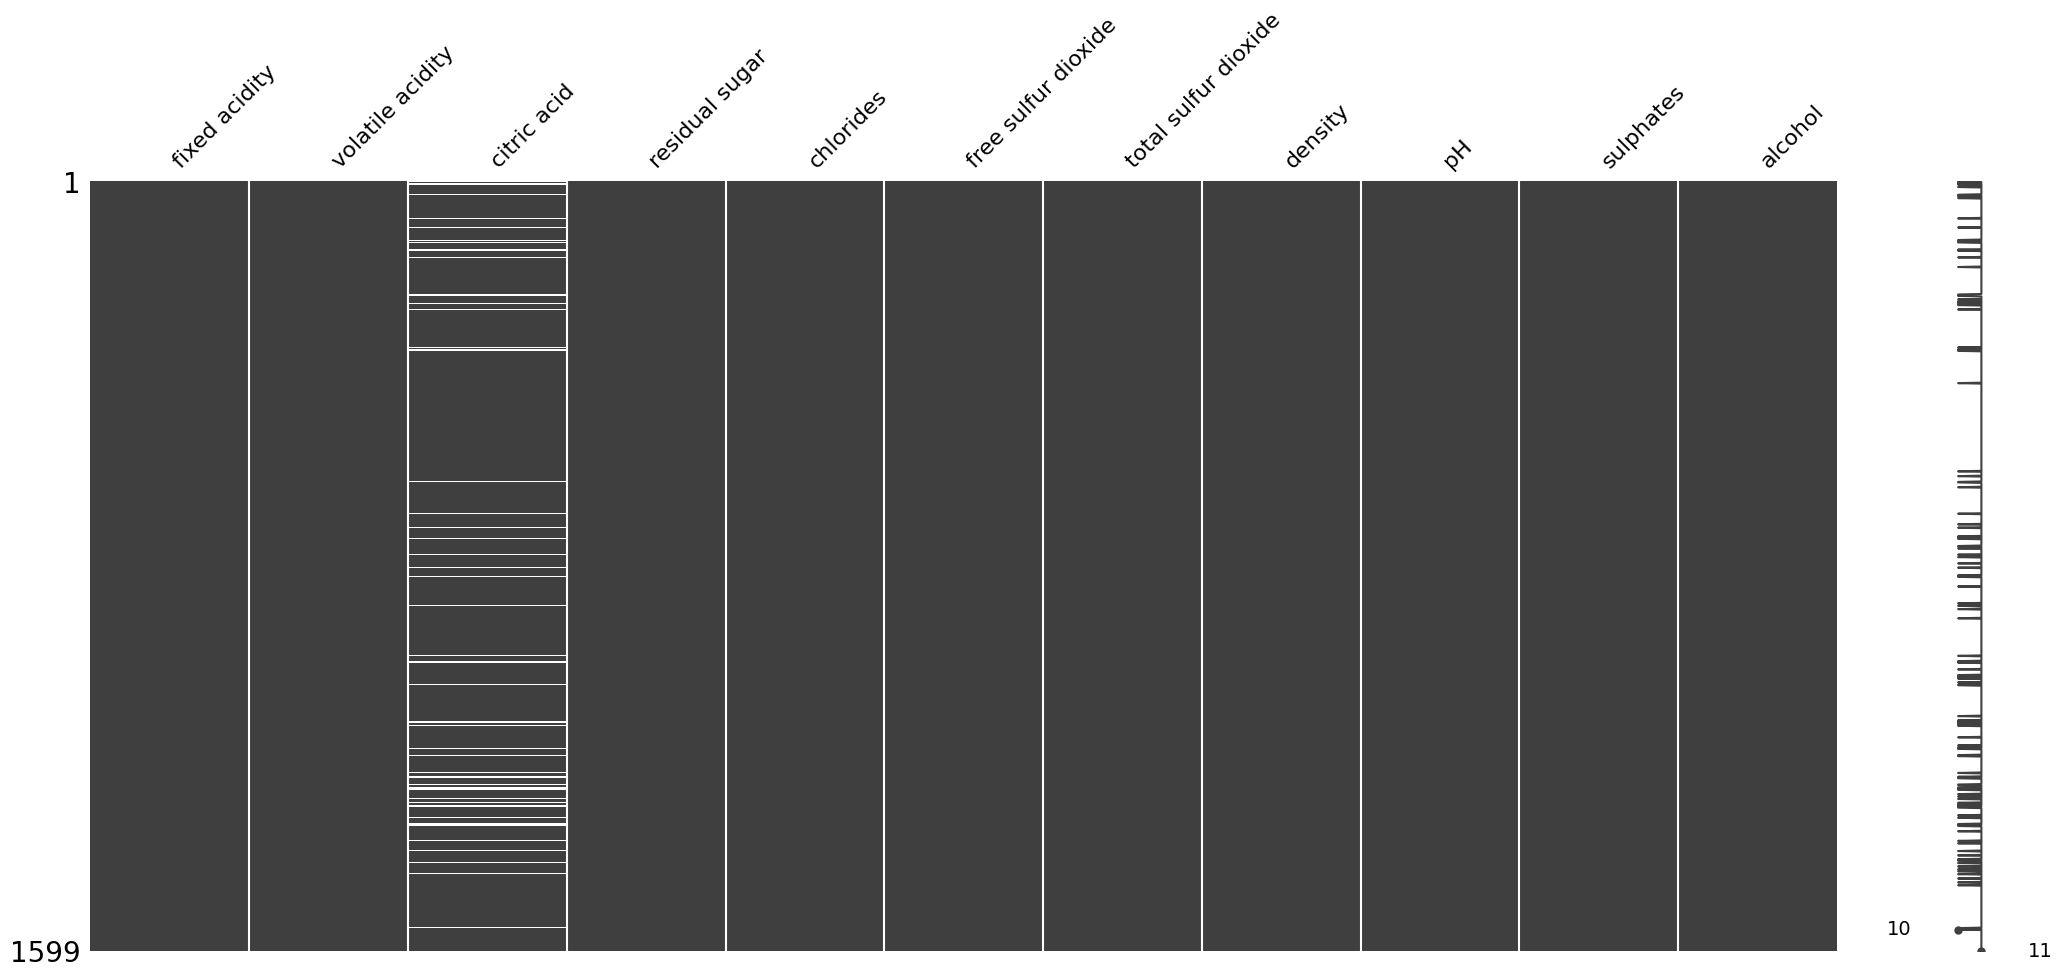

In [6]:
# salvando um NOVO dataset para armazenar o resultado do tratamento de missings

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

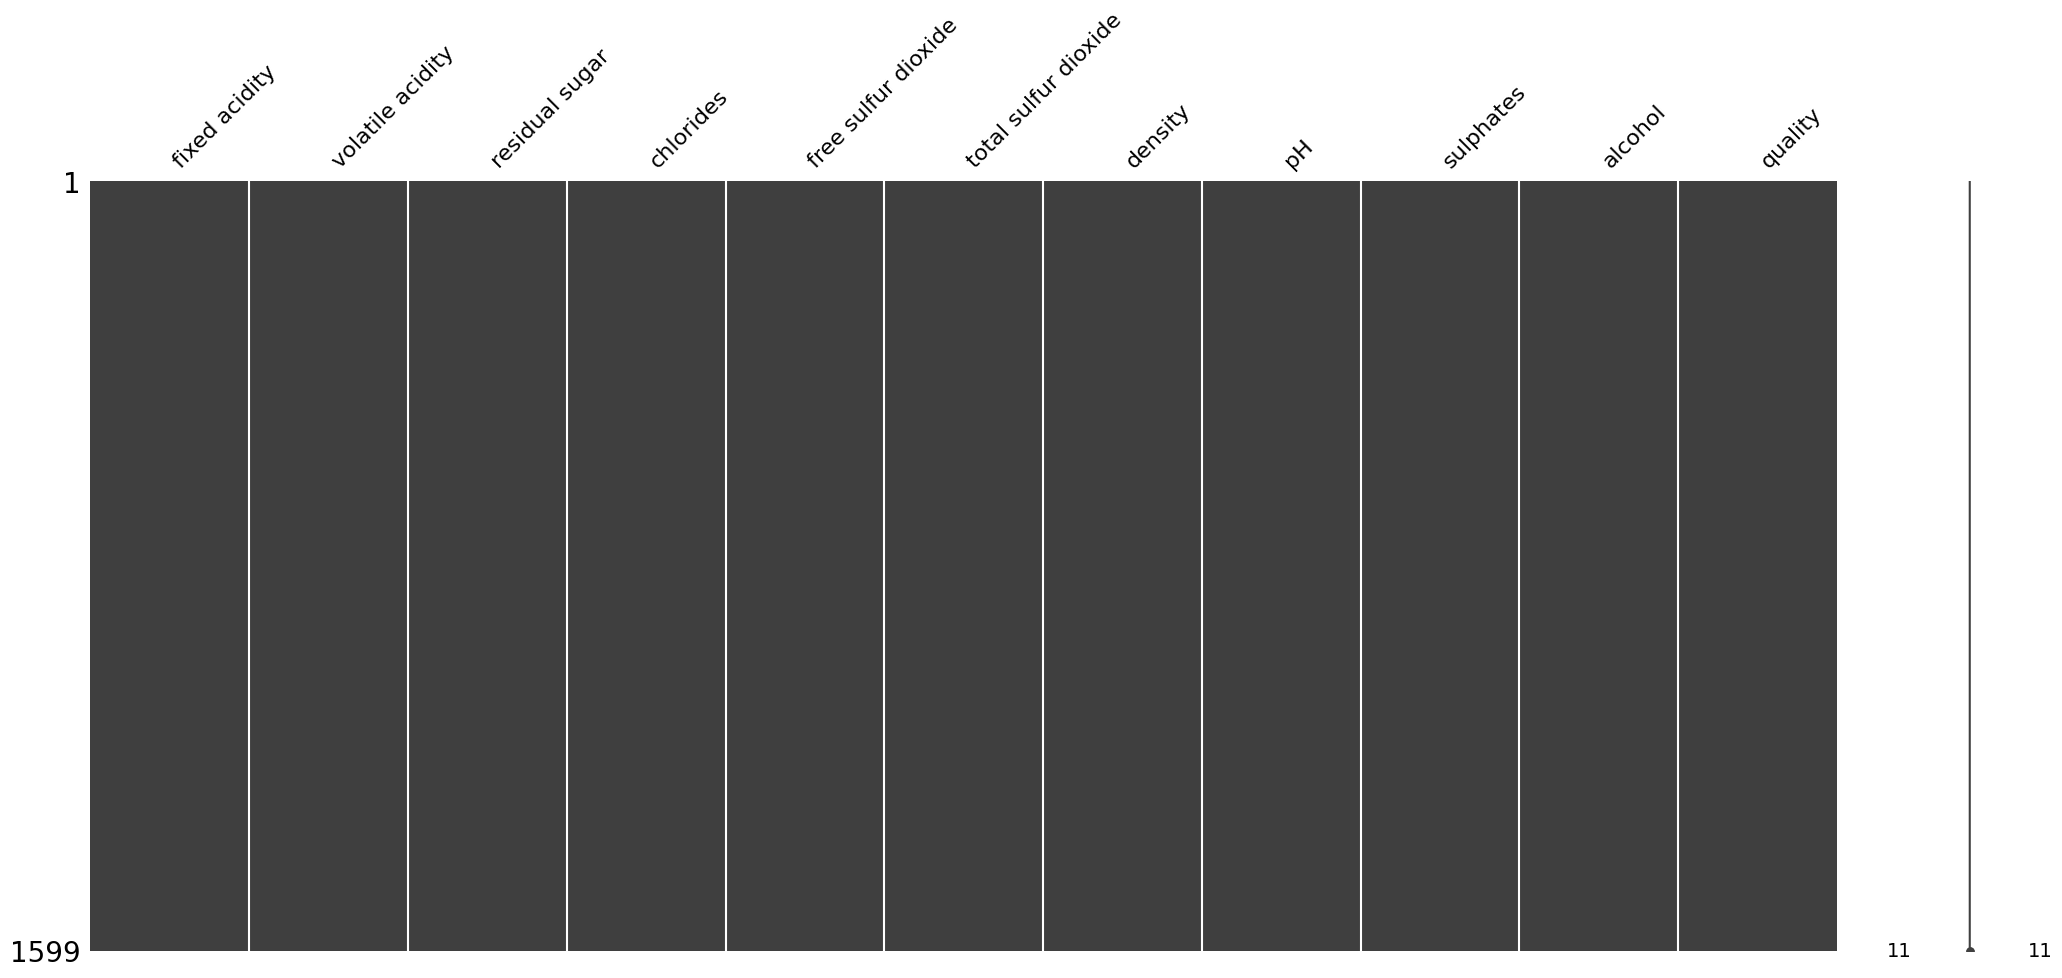

In [13]:
# removendo a coluna 'citrix acid'
atributos.drop(['citric acid'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [14]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'quality' no novo dataset
datasetSemMissings['quality'] = dataset['quality']

# exibindo as primeiras linhas
datasetSemMissings.head()

fixed acidity  volatile acidity  residual sugar  chlorides  \
0            7.4              0.70             1.9      0.076   
1            7.8              0.88             2.6      0.098   
2            7.8              0.76             2.3      0.092   
3           11.2              0.28             1.9      0.075   
4            7.4              0.70             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### 4.2. Separação em conjunto de treino e conjunto de teste

Antes de realizar a separação, será realizado uma operação de randomização para para garantir que não haja qualquer viés na seleção dos conjuntos de treino e teste, pois os dados são embaralhados antes da divisão.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Embaralhar os dados
dados_embaralhados = shuffle(dataset, random_state=42)  # random_state é usado para garantir a reprodutibilidade

# Dividir os dados em treino e teste
X = dados_embaralhados.drop('quality_cat', axis=1)  # "quality_cat" é a variável que quero prever
y = dados_embaralhados['quality_cat']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


A opção utilizada para a divisão do dataset é 80/20. Onde 80% é o conjunto de teste. 20% restante é separado entre 10% validação e 10% teste. Essa separação servirá para treinar o modelo no conjunto de treino, ajustar hiperparâmetros no conjunto de validação e, finalmente, avaliar o desempenho no conjunto de teste.

In [25]:
from sklearn.model_selection import train_test_split

# Divisão inicial em treino (80%) e resto (20%)
X_treino, X_resto, y_treino, y_resto = train_test_split(X, y, test_size=0.2, random_state=42)

# Divisão do resto em validação (10%) e teste (10%)
X_validacao, X_teste, y_validacao, y_teste = train_test_split(X_resto, y_resto, test_size=0.5, random_state=42)


## 5. Conclusão

Durante as análises realizadas neste trabalho é possível afirmar que não há nenhum aributo que se correlaciona fortemente com outro, especialmente em relação ao atributo dependente ("quality).

Outro achado é em relação a distribuição do atributo dependente ('quality") que quando transformado para melhorar a distribuição ("quality_cat), foi possível ver que a maior parte das instâncias corresponde a apenas uma das 3 classes dentro do atributo (**2- bom: 1518** / 3- ótimo: 18 / 1: ruim: 63). Por conta disso, as análises sobre a correlação por exemplo podem estar afetadas.

E por fim, foi possível também observar que há muitos outliers, muito possivelmente por conta da natureza dos dados físico-químicos. Se forem mantidos, será necessário pensar em aplicar um modelo que seja menos sensível a valores extremos, como um algorítimo de máquina tolerante a outliers.